In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from collections import defaultdict
import json
import numpy as np
import pandas as pd
import re

In [2]:
def is_experiment_start(line):
    return line.startswith('evaluating for')

def skip_n_experiments(input_file, experiment_num):
    current_experiment = 0
    while current_experiment < experiment_num:
        line = input_file.readline()
        if is_experiment_start(line):
            current_experiment += 1
            
def get_metrics(line):
    regexp = re.compile(r'[a-zA-Z0-9_]+\: [0-9\.]+')
    result = {}
    for metric_str in regexp.findall(line):
        metric, value = metric_str.split(': ')
        result[metric] = float(value)
    return result
    
            
def parse_experiment(experiment_log):
    current_recommender = None
    result = []
    cnt =0
    metrics = []
    for line in experiment_log:
            if line.startswith('evaluating '):
                current_recommender = line.split(' ')[1]
                metrics = []
            if 'val_ndcg_at_40' in line:
                    metrics.append(get_metrics(line))
            try:
                experiment_results = json.loads(line)
                experiment_results['model_name'] =  current_recommender
                experiment_results['metrics_history'] = metrics
                result.append(experiment_results)
            except:
                pass
    return result

def get_data_from_logs(logfile, experiment_num):
    current_experiment = 0
    with open(logfile) as input_file:
        skip_n_experiments(input_file, experiment_num)
        experiment_log = []
        for line in input_file:
            if is_experiment_start(line):
                break
            else:
                experiment_log.append(line.strip())
        return parse_experiment(experiment_log)

In [3]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [4]:
experiment_logs = './results/booking_config_2021_01_16T14_07_20/stdout'
data = get_data_from_logs(experiment_logs, 0)


In [5]:
df = pd.DataFrame(data).set_index('model_name').sort_values('ndcg@40')
df

,precision@4,SPS@4,ndcg@4,ndcg@40,model_build_time,model_inference_time,model_metadata,metrics_history
model_name,,,,,,,,
top_recommender,0.012525,0.050100,0.028325,0.075407,0.109125,0.026073,{},[]
conditional_top_recommender,0.089763,0.355711,0.269893,0.346563,0.009286,0.031916,{},[]
transitions_chain_recommender,0.114228,0.456914,0.353790,0.438548,1.572902,12.820021,{},[]
APREC-GMLPHE-Lambdarank-256,0.127505,0.510020,0.409914,0.487177,30539.990019,32.086468,"{'epochs_trained': 47, 'best_val_ndcg': 0.5281...","[{'loss': 5.4684, 'ndcg_at_40': 0.18, 'Success..."


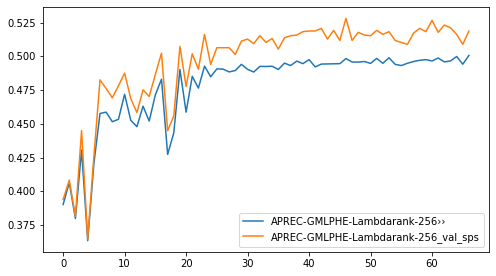

In [6]:
def get_metric(metric_history, metric_name):
    result = []
    for item in metric_history:
        try:
            result.append(item[metric_name])
        except:
            print(item)
    return result

plt.figure(figsize=(8, 4.5))
for recommender in data:
    if len(recommender['metrics_history']) > 0:
        history = recommender['metrics_history']
        ndcg = get_metric(history, 'ndcg_at_40')
        val_ndcg = get_metric(history, 'val_ndcg_at_40')
        
        success = get_metric(history, 'Success_at_4')
        val_success = get_metric(history, 'val_Success_at_4')
        
        plt.plot(val_ndcg, label=recommender['model_name'] + "››")
        plt.plot(val_success, label=recommender['model_name'] + "_val_sps")
plt.legend()


In [ ]:
list(enumerate(pd.DataFrame(data[3]['metrics_history'])['ndcg_at_40']))

In [14]:
df = pd.DataFrame(data[3]['metrics_history'])

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

       loss  ndcg_at_40  Success_at_4  val_loss  val_ndcg_at_40  \
0    5.4684      0.1800        0.2313    9.4373          0.3903   
1    9.6133      0.3269        0.4488   14.1250          0.4065   
2   10.7155      0.3434        0.4731   26.7554          0.3799   
3   11.7041      0.3519        0.4844   15.6758          0.4306   
4   12.6148      0.3587        0.4943   36.1258          0.3635   
5   13.6542      0.3646        0.5022   21.5560          0.4204   
6   14.6213      0.3686        0.5089   20.2041          0.4577   
7   15.5128      0.3725        0.5147   21.9885          0.4587   
8   16.4286      0.3747        0.5180   24.7055          0.4516   
9   17.3521      0.3784        0.5228   25.2461          0.4534   
10  18.1123      0.3801        0.5260   22.3424          0.4719   
11  18.9395      0.3814        0.5270   24.0332          0.4527   
12  19.7471      0.3845        0.5319   29.0355          0.4479   
13  20.4985      0.3867        0.5348   28.3707          0.463

In [ ]:
max(['val_Success_at_4'])

In [10]:
best = 0
time_since_best = []
for i in range (1, len(arr)):
    if arr[i] > arr[best]:
        best = i
    time_since_best.append(i - best)

In [12]:
plt.plot(time_since_best)